# **IMPORT LIBRARY**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **READ DATA**

In [3]:
data = pd.read_csv("covid19.csv")

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Melihat Informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


## Melihat Tipe Data NULL

In [6]:
data.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# **GRAFIK BATANG**

## Jumlah Kematian di Wilayah WHO

Mengelompokkan data

In [7]:
kematian = data.groupby('WHO Region')[['WHO Region','Deaths']].sum().sort_values(by=['Deaths'],ascending=False).head(10)
kematian.reset_index(inplace = True)

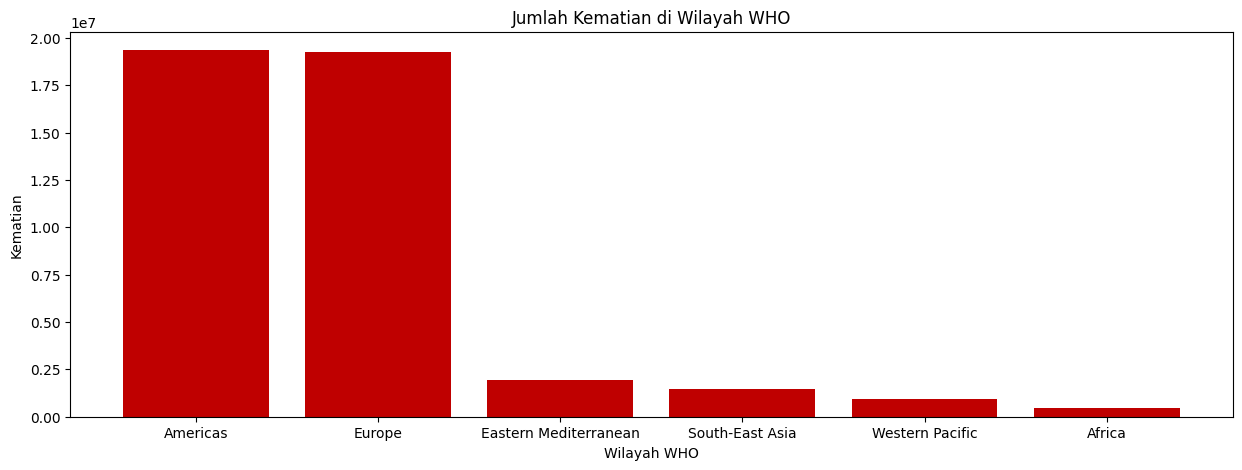

In [9]:
plt.figure(figsize=(15,5))
plt.bar(kematian['WHO Region'],kematian['Deaths'],color='#bf0000')
plt.title("Jumlah Kematian di Wilayah WHO")
plt.xlabel('Wilayah WHO')
plt.ylabel('Kematian')
plt.show()

Terlihat pada grafik batang bahwa jumlah kematian terbanyak berada di America dan jumlah kematian terbanyak kedua berada di Eropa dan jumlah kematian terkecil ada di Afrika

### Menyimpan data Kematian di Wilayah WHO

In [10]:
kematian.to_csv("Kasus Kematian.csv")

# **GRAFIK HEATMAP**

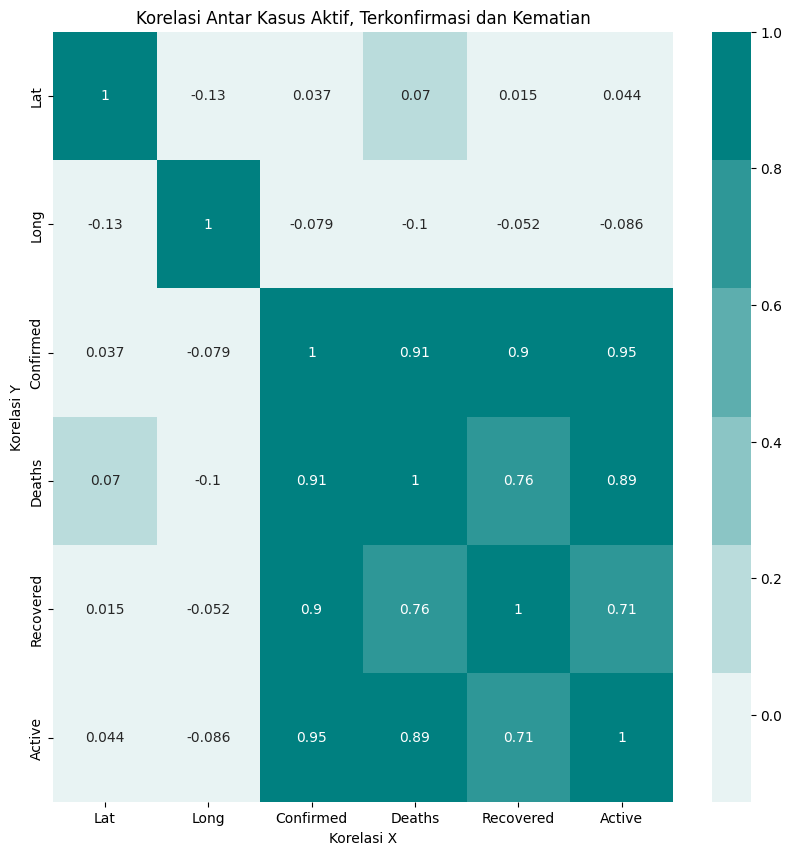

In [11]:
warna = sns.light_palette("#008080")
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap=warna)
plt.title("Korelasi Antar Kasus Aktif, Terkonfirmasi dan Kematian")
plt.xlabel('Korelasi X')
plt.ylabel('Korelasi Y')
plt.show()

Dari atas disimpulkan bahwa Wilayah Amerika memiliki catatan kematian tertinggi karena catatan kasus Aktif tertinggi terlihat dari korelasi diatas

# **GRAFIK LINE**

Melihat tipe data tiap kolom

In [12]:
data.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

Cara merubah tipe data OBJECT ke DATETIME

In [13]:
data["Date"] = pd.to_datetime(data['Date'])

In [14]:
data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [24]:
ind = data[data['Country/Region']== 'Indonesia'][['Date','Recovered','Deaths','Active']]
ind.set_index('Date',inplace = True)
ind.tail(10)

,Recovered,Deaths,Active
Date,,,
2020-07-18,43268,4016,37598
2020-07-19,45401,4143,36977
2020-07-20,46977,4239,36998
2020-07-21,48466,4320,37083
2020-07-22,50255,4459,37037
2020-07-23,52164,4576,36917
2020-07-24,53945,4665,36808
2020-07-25,55354,4714,37218
2020-07-26,56655,4781,37342


In [16]:
ind.resample('M')

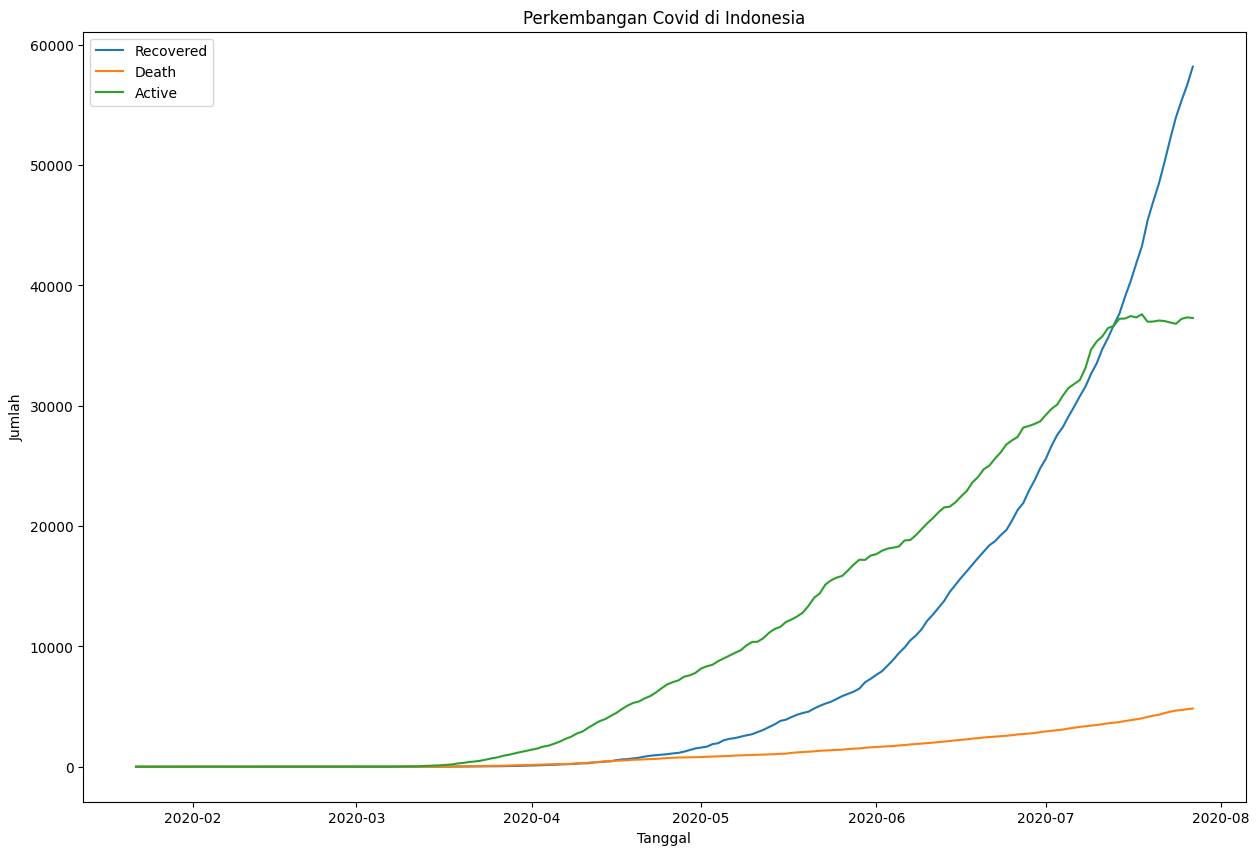

In [17]:
plt.figure(figsize=(15,10))
plt.plot(ind.index, ind)
plt.legend(['Recovered', 'Death','Active']) #untuk menampilkan keterangan
plt.title("Perkembangan Covid di Indonesia")
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.show()

Pada Grafik diatas, Kasus Sembuh di Indonesia lebih tinggi daripada kasus kematian dan kasus aktifnya.

Menyimpan data Date yang bertime DateTime

In [18]:
data.to_csv("datetime.csv")

# **PIE CHART**

Mengelompokkan data

In [19]:
sembuh = data.groupby('WHO Region')[['WHO Region','Recovered']].sum().sort_values(by=['Recovered'],ascending=False)
sembuh.reset_index(inplace = True)

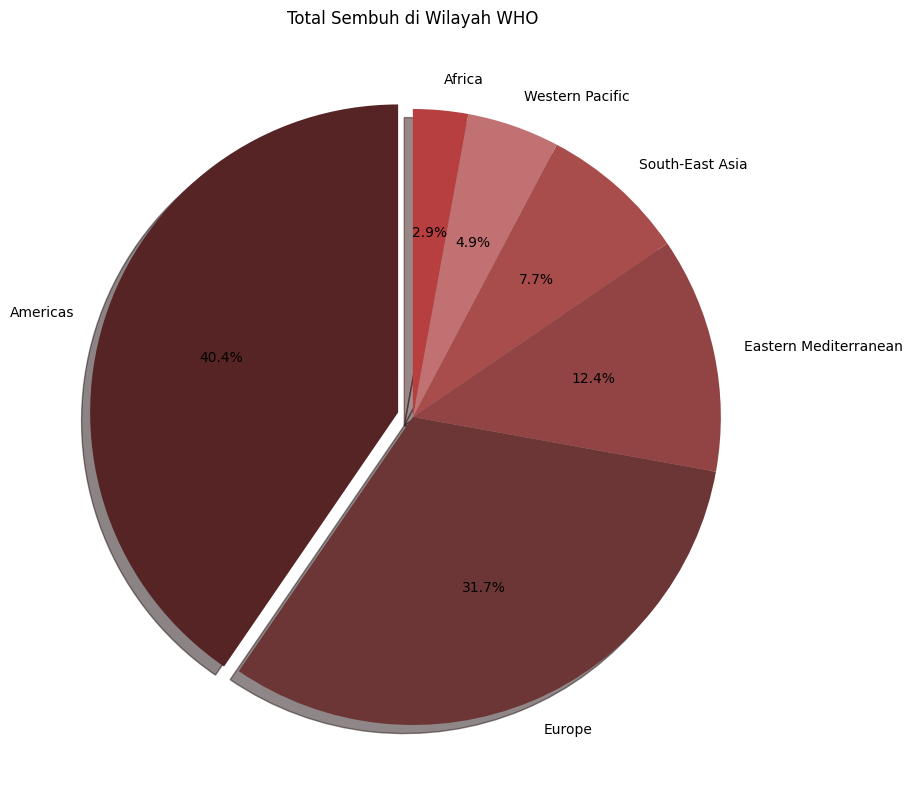

In [20]:
warna_pie = ("#562424","#6d3636","#924444","#a94c4c","#c17171","#b83f3f")
plt.figure(figsize=(10,10))
plt.pie(sembuh["Recovered"],labels=sembuh["WHO Region"],startangle=90,autopct='%.1f%%', shadow=True, explode=(0.05,0,0,0,0,0), colors=warna_pie)
plt.title("Total Sembuh di Wilayah WHO")
plt.show()

Pada grafik Pie diatas menunjukkan bahwa Amerika menjadi wilayah dengan total sembuh tertinggi meskipun dengan kasus kematiannya yang tertinggi pula di wilayah WHO

In [21]:
sembuh.to_csv("Kasus Sembuh.csv")